#获取数据

In [1]:
import pandas as pd
from datetime import datetime

source_path = '项目2价格数据.csv'

df_origin = pd.read_csv(source_path)

df_origin

,细分二级品类,日期,产品,成交量,最高价,最低价
0,HDPE中空料,2024-08-05,5502A|中海壳牌,27.000,7990.0,7990.0
1,HDPE中空料,2024-08-05,5502BN|中化泉州,10.000,7870.0,7870.0
2,HDPE中空料,2024-08-05,5502BN|雪佛龙菲利普斯,5.000,8450.0,8450.0
3,HDPE中空料,2024-08-05,5502FA|上海赛科,21.000,8150.0,8150.0
4,HDPE中空料,2024-08-05,5502GD|中科炼化,107.936,7775.0,7725.0
...,...,...,...,...,...,...
8702,PPHM拉丝料,2025-08-04,PPH-T03|中科炼化,27.000,7210.0,7210.0
8703,PPHM拉丝料,2025-08-04,PPH-T03|巨正源,34.000,7100.0,7090.0
8704,PPHM拉丝料,2025-08-04,T03|东华能源,66.000,6986.0,6969.0
8705,PPHM拉丝料,2025-08-04,T30S|裕龙石化,81.000,7080.0,7050.0


#清洗数据

In [2]:
df_origin['成交量'] = df_origin['成交量'].astype(float)

#df_origin.to_excel(r'daily_volume_data.xlsx', index=False)

In [3]:
# Group by 细分二级品类 and 日期, then sum 成交量
df_grouped = df_origin.groupby(['细分二级品类', '日期'])['成交量'].sum().reset_index()

# Display the grouped DataFrame
df_grouped

,细分二级品类,日期,成交量
0,HDPE中空料,2024-08-05,317.686
1,HDPE中空料,2024-08-06,195.000
2,HDPE中空料,2024-08-07,326.000
3,HDPE中空料,2024-08-08,187.500
4,HDPE中空料,2024-08-09,144.250
...,...,...,...
1223,PPHM拉丝料,2025-07-30,172.500
1224,PPHM拉丝料,2025-07-31,109.500
1225,PPHM拉丝料,2025-08-01,274.625
1226,PPHM拉丝料,2025-08-04,262.000


In [4]:
cat_list = list(df_origin['细分二级品类'].unique())

cat_list

['HDPE中空料', 'LDPE膜料', 'LLDPE膜料', 'PPB注塑料', 'PPHM拉丝料']

#可视化

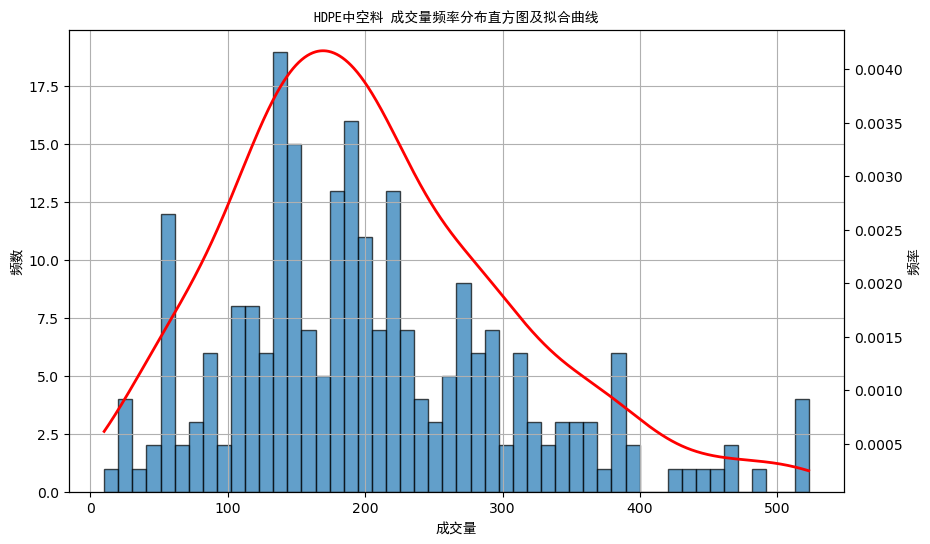

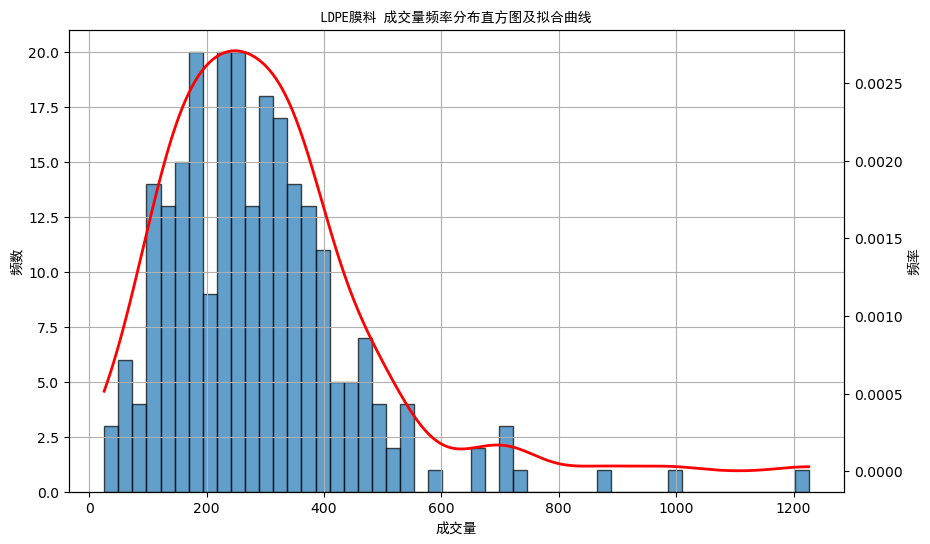

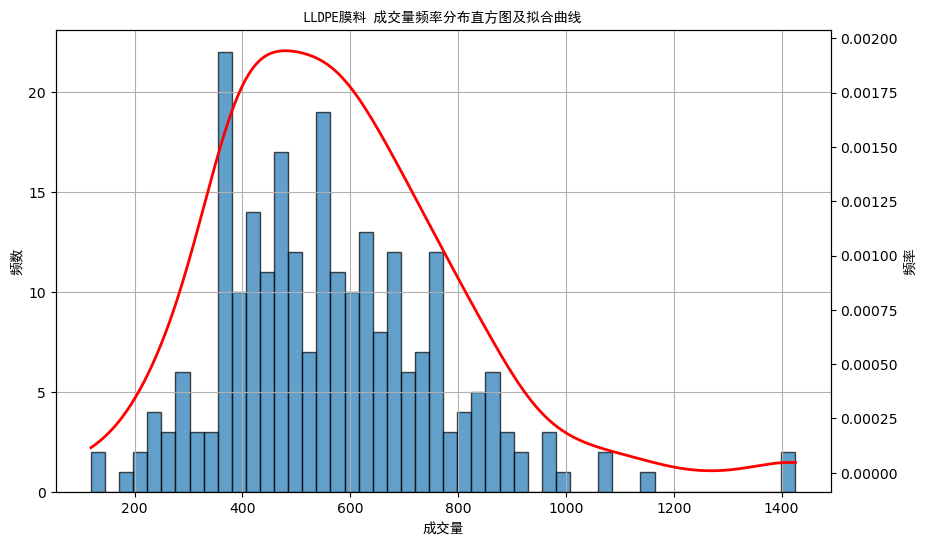

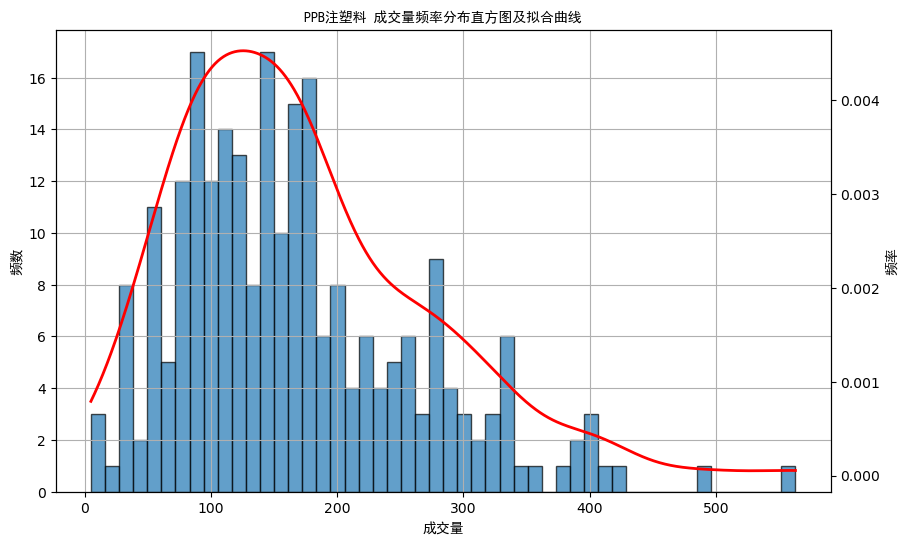

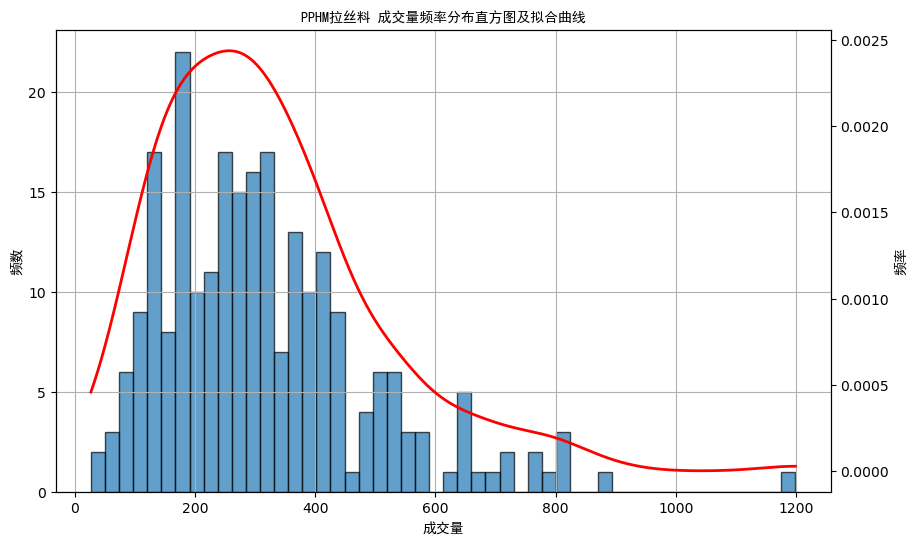

In [6]:
text_list = []
img_list = []

for i in range(len(cat_list)):

    cat = cat_list[i]

    df_cat = df_grouped[df_grouped['细分二级品类'] == cat]

    import matplotlib.pyplot as plt
    import matplotlib.font_manager as fm
    import numpy as np
    from scipy.stats import gaussian_kde

    # Set the font properties to support Chinese characters
    font_path = 'C:/Windows/Fonts/simhei.ttf'  # Path to the SimHei font
    font_prop = fm.FontProperties(fname=font_path)

    # Create the figure and the first y-axis
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot the histogram on the first y-axis
    ax1.hist(df_cat['成交量'], bins=50, edgecolor='k', alpha=0.7)
    ax1.set_xlabel('成交量', fontproperties=font_prop)
    ax1.set_ylabel('频数', fontproperties=font_prop)
    ax1.grid(True)

    # Create the second y-axis
    ax2 = ax1.twinx()

    # Fit the kernel density estimation curve
    kde = gaussian_kde(df_cat['成交量'])
    x_vals = np.linspace(df_cat['成交量'].min(), df_cat['成交量'].max(), 1000)
    kde_vals = kde(x_vals)

    # Plot the KDE curve on the second y-axis
    ax2.plot(x_vals, kde_vals, color='r', lw=2)
    ax2.set_ylabel('频率', fontproperties=font_prop)

    # Set the title
    plt.title(f'{cat} 成交量频率分布直方图及拟合曲线', fontproperties=font_prop)

    plt.savefig(f'{cat}.png')

    img_list.append(f'{cat}.png')

    # Show the plot
    plt.show()

